In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1.9000     ✔ purrr   0.3.2     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   0.8.3          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
df<-read_csv("../input/gtd/globalterrorismdb_0718dist.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  approxdate = col_character(),
  resolution = col_character(),
  country_txt = col_character(),
  region_txt = col_character(),
  provstate = col_character(),
  city = col_character(),
  location = col_character(),
  summary = col_character(),
  alternative_txt = col_character(),
  attacktype1_txt = col_character(),
  attacktype2_txt = col_character(),
  attacktype3 = col_logical(),
  attacktype3_txt = col_logical(),
  targtype1_txt = col_character(),
  targsubtype1_txt = col_character(),
  corp1 = col_character(),
  target1 = col_character(),
  natlty1_txt = col_character(),
  targtype2_txt = col_character(),
  targsubtype2_txt = col_character()
  # ... with 48 more columns
)

See spec(...) for full column specifications.

Warning message:
“7113 parsing failures.
 row             col           expected                                                                                                                      

In [ ]:
spec(df)

In [4]:
library(ggplot2)
library(ggpubr)
theme_set(theme_pubr())

Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




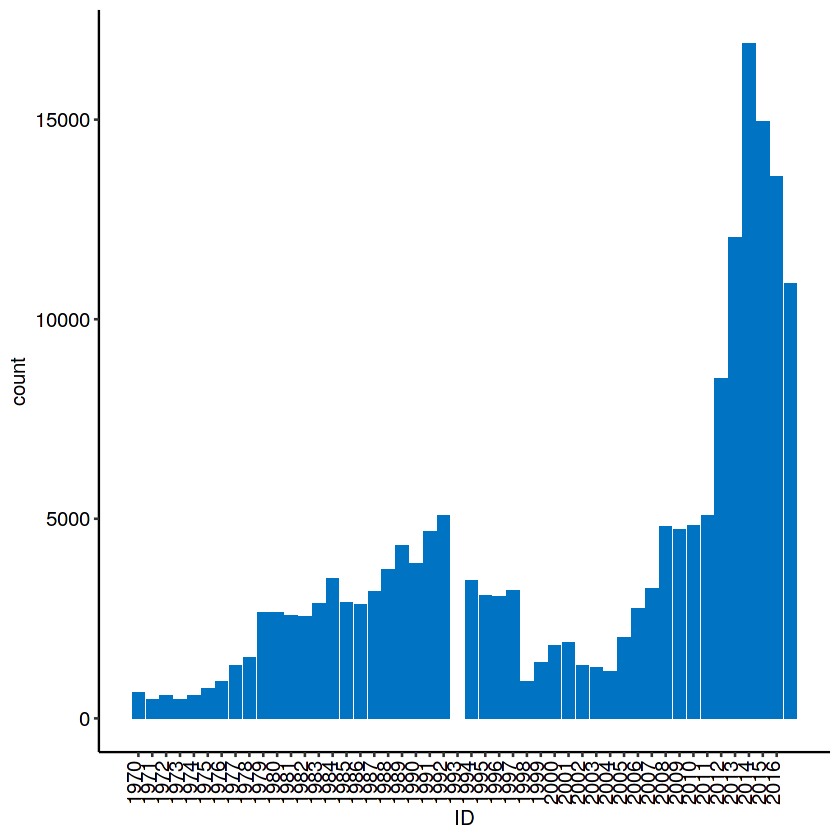

In [5]:
ggplot(df, aes(iyear)) +
  geom_bar(fill = "#0073C2FF")+theme(axis.text.x = element_text(angle = 90, hjust =1, vjust = 0.2))+scale_x_continuous("ID", breaks = seq(1970, 2016, 1))

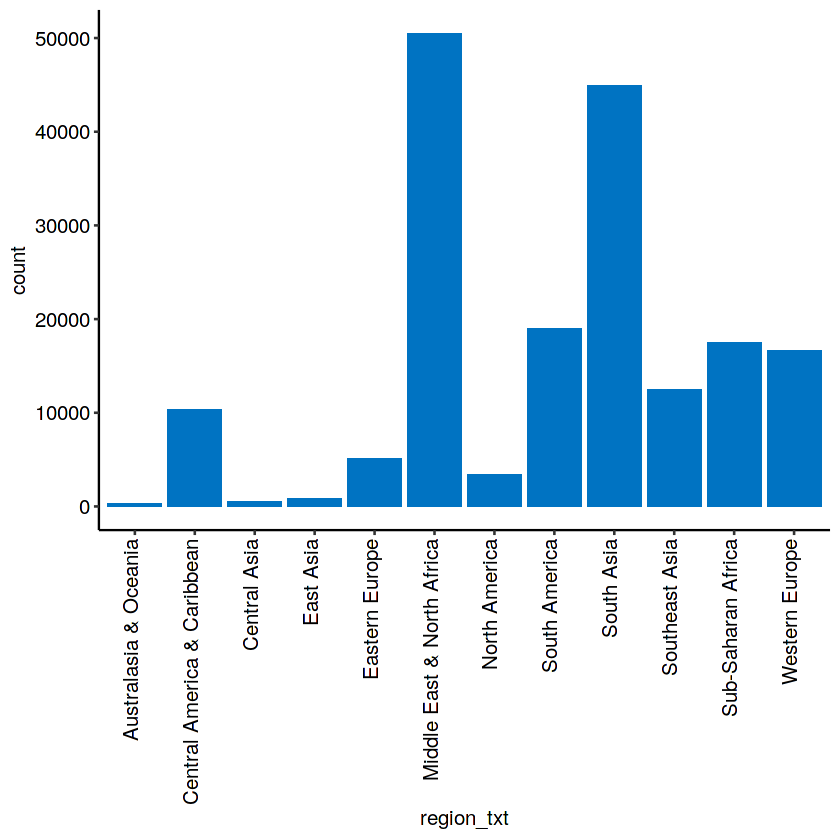

In [6]:
#unique(df$region_txt)
#unique(df$region_txt)
ggplot(df, aes(region_txt)) +
  geom_bar(fill = "#0073C2FF")+theme(axis.text.x = element_text(angle = 90, hjust =1, vjust = 0.2))

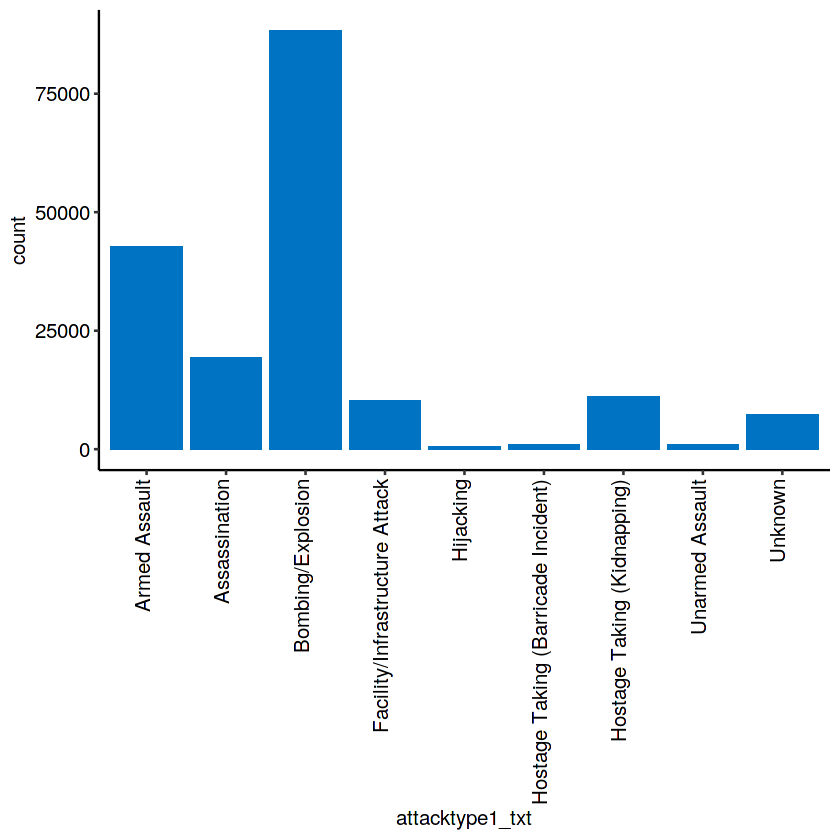

In [7]:
ggplot(df, aes(attacktype1_txt)) +
  geom_bar(fill = "#0073C2FF")+theme(axis.text.x = element_text(angle = 90, hjust =1, vjust = 0.2))

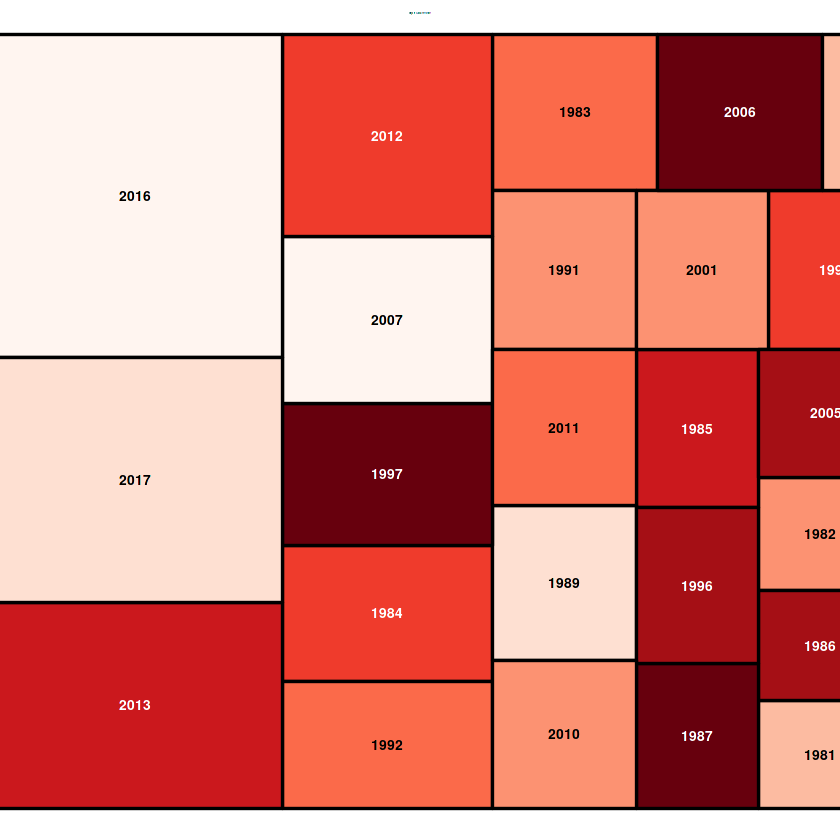

In [19]:
dfk<-df %>% filter(nkill > 0) 
library(treemap)
treemap(dfk, 
        index=c("iyear"), 
        vSize = "nkill",  
        palette = "Reds",  
        title="Killings in Global Terrorism", 
        fontsize.title = 1,
        fontsize.labels=c(8,4)
)

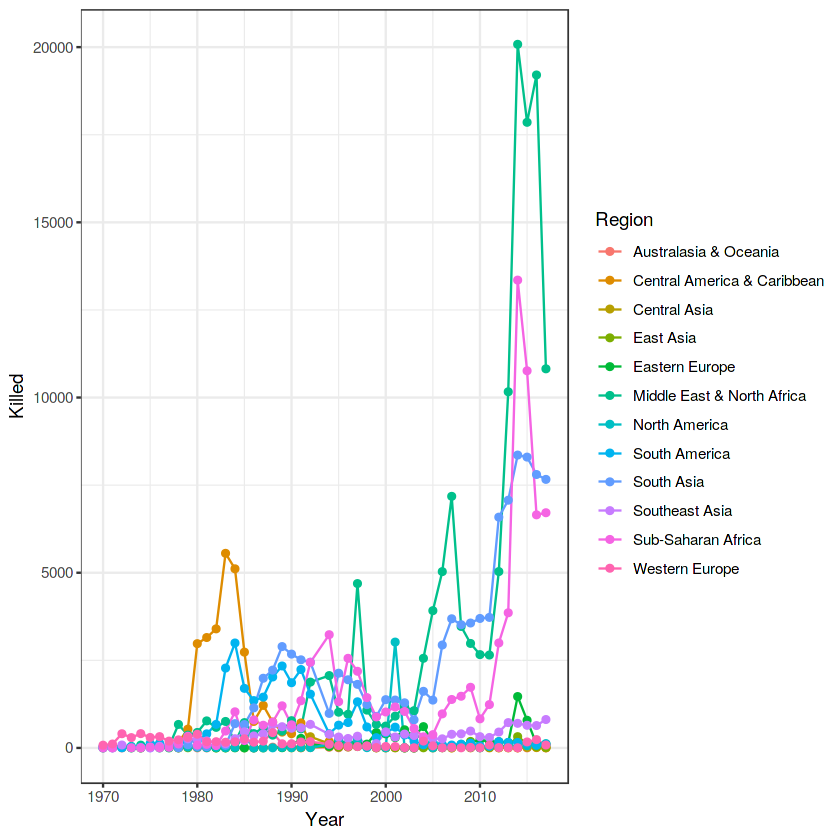

In [9]:
dfk %>% group_by(iyear,region_txt) %>% summarise(nkills = sum(nkill)) %>% ungroup() -> dfyr
colnames(dfyr)<-c("Year","Region","Killed")
ggplot(data = dfyr, aes(x = Year, y = Killed, colour = Region)) +       
   geom_line() + geom_point() + theme_bw()